<a href="https://colab.research.google.com/github/1zulkifel/DATA_SCIENCE_/blob/main/10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised Learning
 - Given a dataset of input-output pairs, learn a function to map inputs to outputs
 - There are different tasks - but we start to focus on **Classification**
 
 
 ### Classification
 - **Supervised learning**: the task of learning a function mapping an input point to a descrete category

### Example: Iris Flower Dataset
- [Kaggle Iris Flower Dataset](https://www.kaggle.com/arshid/iris-flower-dataset)
- Consists of three classes: `Iris-setosa`, `Iris-versicolor`, and `Iris-virginica`
- Given depedent features can we predict class

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [7]:
data=pd.read_csv('/content/iris.csv',index_col=0)

In [8]:
data.head

<bound method NDFrame.head of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0  

In [9]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
data.isna().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Machine Leaning
- A Few Machine Learning Models
    - [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) C-Support Vector Classification.
    - [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) Classifier implementing the k-nearest neighbors vote.
- Steps
    - **Step 1**: Assign independent features (those predicting) to `X`
    - **Step 2**: Assign classes (labels/dependent features) to `y`
    - **Step 3**: Divide into training and test sets
    ```Python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
    - **Step 4**: Create the model
    ```Python
svc = SVC()
```
    - **Step 5**: Fit the model
    ```Python
svc.fit(X_train, y_train)
```
    - **Step 6**: Predict with the model
    ```Python
y_pred = svc.predict(X_test)
```
    - **Step 7**: Test the accuracy
    ```Python
accuracy_score(y_test, y_pred)
```

In [11]:
X = data.drop('Species', axis=1)
y = data['Species']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Finding most important feature
- [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) Permutation importance for feature evaluation.
- Use the `permutation_importance` to calculate it.
```Python
perm_importance = permutation_importance(svc, X_test, y_test)
```
- The results will be found in `perm_importance.importances_mean`

In [14]:
from sklearn.inspection import permutation_importance

In [15]:
perm_importance = permutation_importance(svc, X_test, y_test)
perm_importance.importances_mean

array([0.02      , 0.00666667, 0.57333333, 0.19333333])

### Visualize the features by importance
- The most important features are given by `perm_importance.importances_mean.argsort()`
    - HINT: assign it to `sorted_idx`
- To visualize it we can create a DataFrame
```Python
pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
```
- Then make a `barh` plot (use `figsize`)

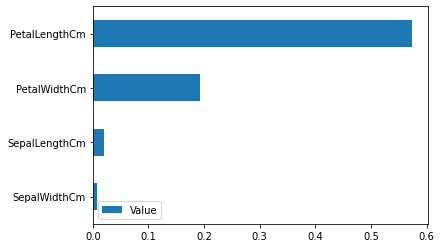

In [16]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()

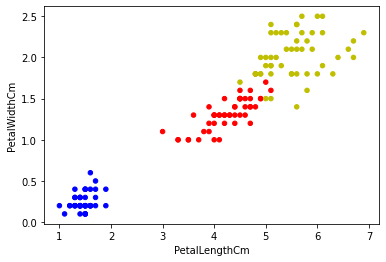

In [17]:
color_map = {'Iris-setosa': 'b', 'Iris-versicolor': 'r', 'Iris-virginica': 'y'}

colors = data['Species'].apply(lambda x: color_map[x])

data.plot.scatter(x='PetalLengthCm', y='PetalWidthCm', c=colors)

### KNeighborsClassifier
- It is similar for `KNeighborsClassifier`

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [20]:
erm_importance = permutation_importance(kn, X_test, y_test)
perm_importance.importances_mean

array([0.02      , 0.00666667, 0.57333333, 0.19333333])

In [21]:
perm_importance = permutation_importance(kn, X_test, y_test)
perm_importance.importances_mean

array([0.00666667, 0.02666667, 0.57333333, 0.17333333])